## **Import Library**

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_theme(style="whitegrid")

## **Show Dataset**

In [2]:
data = pd.read_csv("onlinefoods.csv")
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


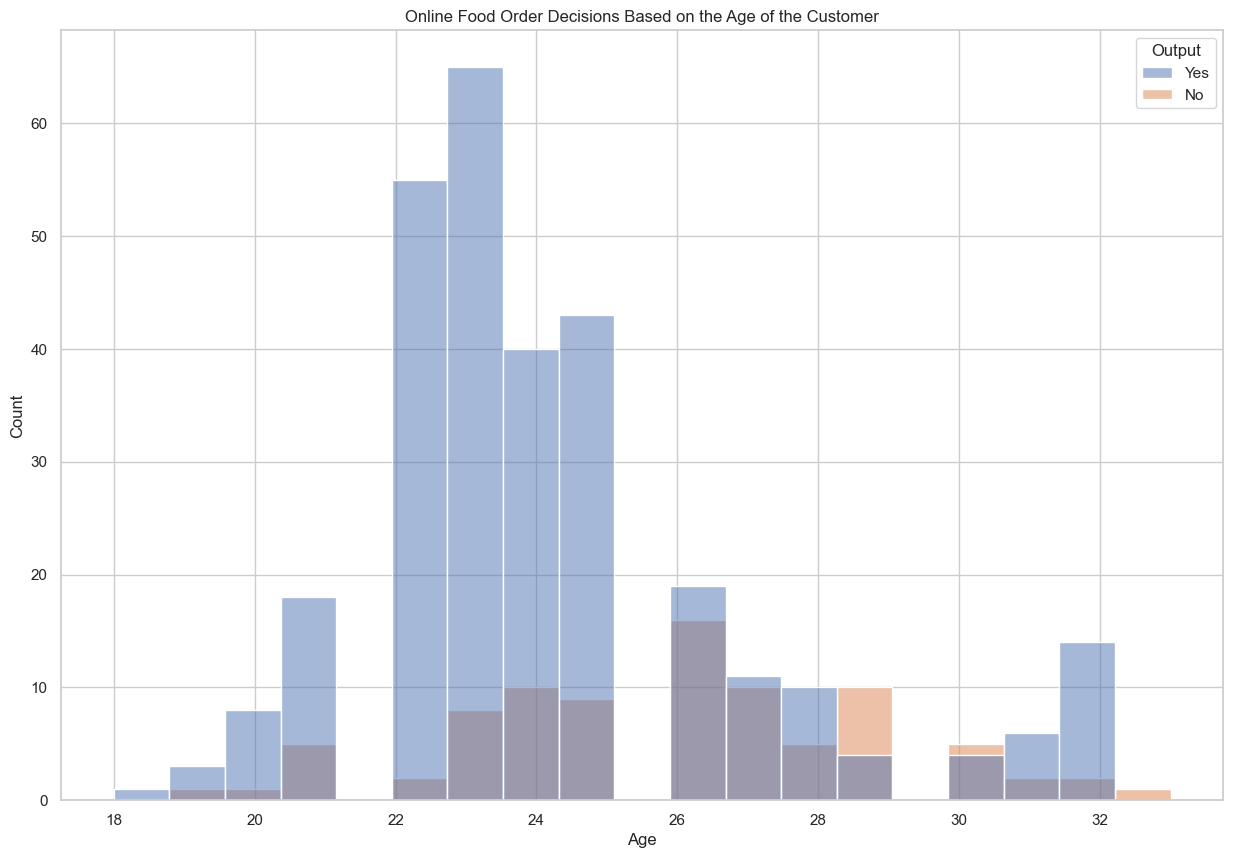

In [4]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.histplot(x="Age", hue="Output", data=data)
plt.show()

Kita dapat melihat bahwa kelompok usia 22-25 sering memesan makanan lagi. Hal ini juga berarti kelompok usia ini menjadi target utama perusahaan pengiriman makanan online. Sekarang mari kita lihat keputusan pemesanan makanan online berdasarkan ukuran keluarga pelanggan: hargailah hal ini.

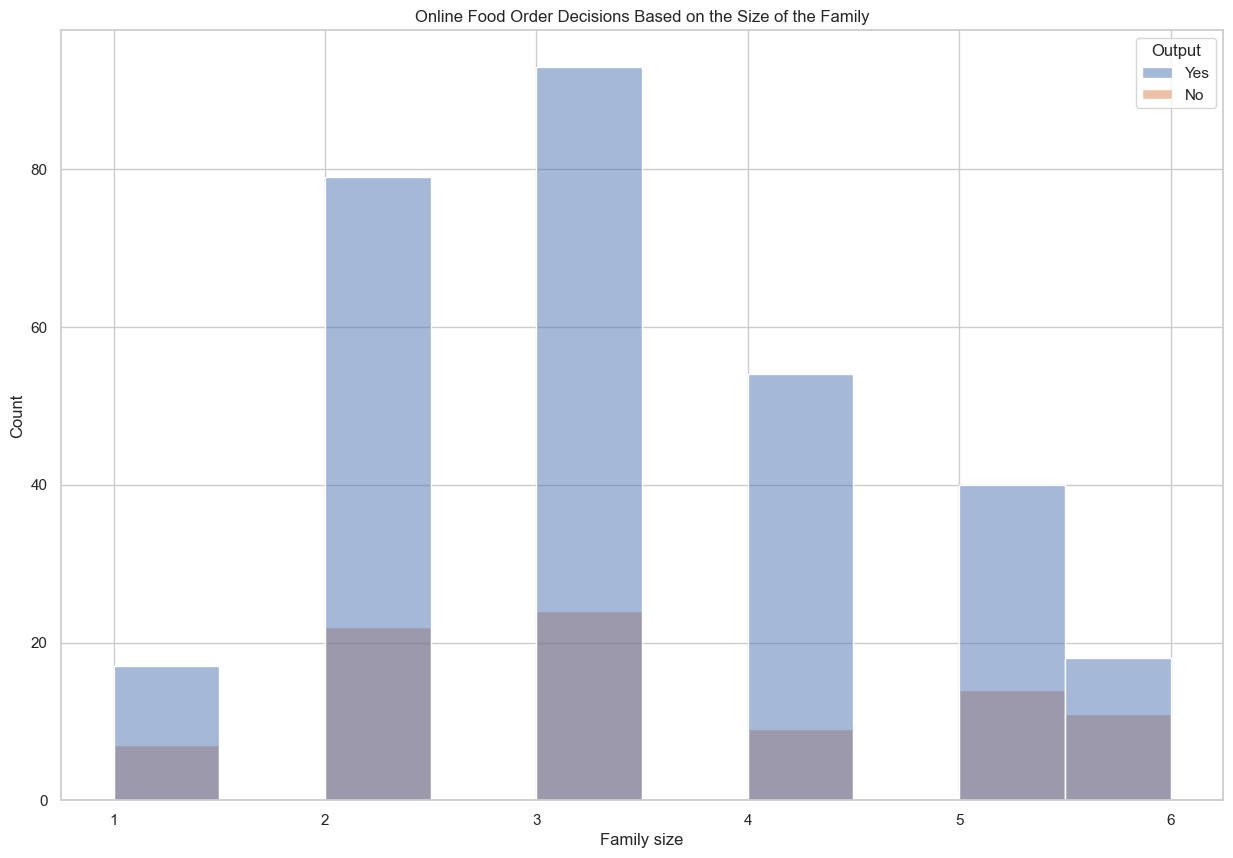

In [5]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.histplot(x="Family size", hue="Output", data=data)
plt.show()

Keluarga dengan 2 dan 3 anggota sering memesan makanan. Ini bisa berupa teman sekamar, pasangan, atau keluarga beranggotakan tiga orang.

In [6]:
buying_again_data = data.query("Output == 'Yes'")
print(buying_again_data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [7]:
gender = buying_again_data["Gender"].value_counts()
label = gender.index
counts = gender.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Male Vs. Female')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

Menurut dataset, pelanggan pria memesan lebih banyak dibandingkan dengan pelanggan wanita. Sekarang mari kita lihat status perkawinan pelanggan yang memesan lagi:

In [8]:
marital = buying_again_data["Marital Status"].value_counts()
label = marital.index
counts = marital.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Married Vs. Singles')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

Berdasarkan gambar di atas, 76,1% dari pelanggan setia adalah lajang. Sekarang mari kita lihat kelompok pendapatan pelanggan yang memesan makanan lagi:

In [9]:
income = buying_again_data["Monthly Income"].value_counts()
label = income.index
counts = income.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Which Income Group Orders Food Online More')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

Berdasarkan gambar di atas, 54% pelanggan tidak termasuk dalam kelompok pendapatan mana pun. Mereka bisa saja ibu rumah tangga atau mahasiswa.

Sekarang mari kita siapkan data untuk tugas melatih model pembelajaran mesin. Di sini saya akan mengubah semua fitur kategorikal menjadi nilai numerik:

In [10]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2,
                                                     "Single": 1,
                                                     "Prefer not to say": 0})
data["Occupation"] = data["Occupation"].map({"Student": 1,
                                             "Employee": 2,
                                             "Self Employeed": 3,
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1,
                                                                             "Post Graduate": 2,
                                                                             "Ph.D": 3, "School": 4,
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0,
                                                     "25001 to 50000": 5000,
                                                     "More than 50000": 7000,
                                                     "10001 to 25000": 25000,
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})
print(data.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1           1               0   
1   24       0               1           1           10000   
2   22       1               1           1           10000   
3   22       0               1           1               0   
4   22       1               1           1           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes         1         Yes  
1    Yes         1         Yes  
2    Yes         0         Yes  
3    Yes         1         Yes  

## **Online Food Order Prediction Model**

Sekarang mari kita latih model pembelajaran mesin untuk memprediksi apakah seorang pelanggan akan memesan lagi atau tidak. Saya akan mulai dengan membagi data menjadi set pelatihan dan set uji:

In [11]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation",
                   "Monthly Income", "Educational Qualifications",
                   "Family size", "Pin code", "Feedback"]])
y = np.array(data[["Output"]])

Sekarang mari kita latih model pembelajaran mesin:

In [12]:
# training a machine learning model
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.10,
                                                random_state=42)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

c:\Users\Legion\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9487179487179487


In [13]:
# Simpan model ke file
joblib.dump(model, "customer_model.pkl")
print("Model berhasil disimpan ke 'customer_model.pkl'")

Model berhasil disimpan ke 'customer_model.pkl'


Sekarang mari kita siapkan formulir untuk memasukkan data pelanggan dan memprediksi apakah pelanggan akan memesan makanan lagi atau tidak:

In [ ]:
# Load model (dan scaler kalau ada)
model = joblib.load("customer_model.pkl")
# scaler = joblib.load("scaler.pkl")  # kalau kamu pakai scaler

import ipywidgets as widgets
from IPython.display import display, clear_output

# Widget untuk input data
age = widgets.IntText(description='Age:')
gender = widgets.Dropdown(options=[('Male', 1), ('Female', 0)], description='Gender:')
marital = widgets.Dropdown(options=[('Single', 1), ('Married', 2), ('Not Revealed', 3)], description='Marital Status:')
occupation = widgets.Dropdown(options=[('Student', 1), ('Employee', 2), ('Self Employeed', 3), ('House wife', 4)], description='Occupation:')
income = widgets.FloatText(description='Monthly Income:')
education = widgets.Dropdown(options=[('Graduate', 1), ('Post Graduate', 2), ('Ph.D', 3), ('School', 4), ('Uneducated', 5)], description='Education:')
family_size = widgets.IntText(description='Family Size:')
pin_code = widgets.IntText(description='Pin Code:')
review = widgets.Dropdown(options=[('Positive', 1), ('Negative', 0)], description='Last Review:')
button = widgets.Button(description='Predict')
output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()
        features = np.array([[age.value, gender.value, marital.value, occupation.value,
                              income.value, education.value, family_size.value, pin_code.value, review.value]])
        # features = scaler.transform(features)  # kalau pakai scaler
        prediction = model.predict(features)
        if prediction[0] == 1:
            print('Customer is predicted to order again.')
        else:
            print('Customer is predicted NOT to order again.')

button.on_click(on_button_clicked)
display(age, gender, marital, occupation, income, education, family_size, pin_code, review, button, output)
# Hapus baris print di luar fungsi

IntText(value=0, description='Age:')

Dropdown(description='Gender:', options=(('Male', 1), ('Female', 0)), value=1)

Dropdown(description='Marital Status:', options=(('Single', 1), ('Married', 2), ('Not Revealed', 3)), value=1)

Dropdown(description='Occupation:', options=(('Student', 1), ('Employee', 2), ('Self Employeed', 3), ('House w…

FloatText(value=0.0, description='Monthly Income:')

Dropdown(description='Education:', options=(('Graduate', 1), ('Post Graduate', 2), ('Ph.D', 3), ('School', 4),…

IntText(value=0, description='Family Size:')

IntText(value=0, description='Pin Code:')

Dropdown(description='Last Review:', options=(('Positive', 1), ('Negative', 0)), value=1)

Button(description='Predict', style=ButtonStyle())

Output()

Begini cara melatih model pembelajaran mesin untuk memprediksi pesanan makanan online.